Провести дополнительный анализ:
1. Сгенерировать не менее 100 пользователей
2. выявить, есть ли закономерность в возрасте при генерации автоматически возраст пользователей.

In [9]:
import requests
import matplotlib.pyplot as plt

Создадим функцию генерации пользователей

In [10]:
def get_random_user_age():
    url = "https://randomuser.me/api/"
    response = requests.get(url)
    data = response.json()
    return data['results'][0]['dob']['age']

Сгенерируем 666 пользователей

In [11]:
ages = [get_random_user_age() for _ in range(666)]


Визуализируем возраст пользователей

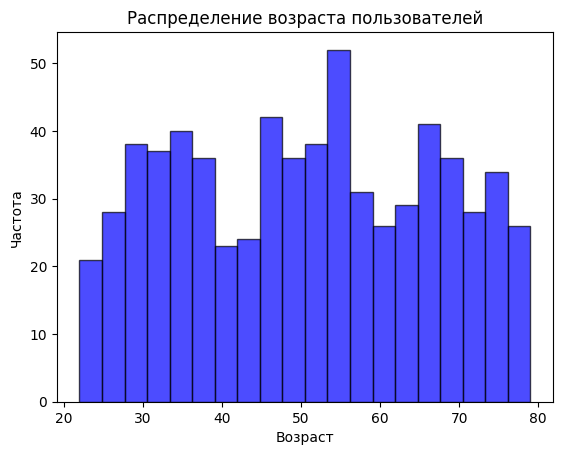

In [19]:
plt.hist(ages, bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

По графику мы можем увидеть, что человек в возрасте меньше 20, а также больше 80 не было сгенерировано, поэтому мы не будем включать эти категории в круговую диаграмму.

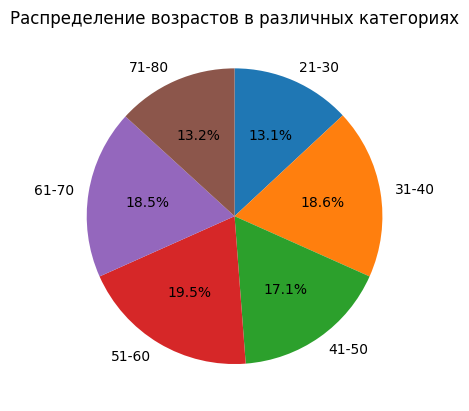

In [18]:
categories = {'21-30': 0, '31-40': 0, '41-50': 0, '51-60': 0, '61-70': 0, '71-80': 0}
for age in ages:
    for category in categories:
        min_age, max_age = map(int, category.split('-'))
        if min_age <= age <= max_age:
            categories[category] += 1
            break

plt.pie(categories.values(), labels=categories.keys(), autopct='%1.1f%%', startangle=90, counterclock=False, labeldistance=1.1)
plt.title('Распределение возрастов в различных категориях')
plt.show()

Анализируя данную круговую диаграмму мы можем сказать о том, что закономерность в возрасте при генерации автоматически возраста пользователей отсутствует, т.к. пользователей было сгенерировано примерно одинаковое количество, что не соответствует действительности, в чем можно убедиться, посмотрев на пираму населения ниже.

Пирамида населения мира в 2024 году
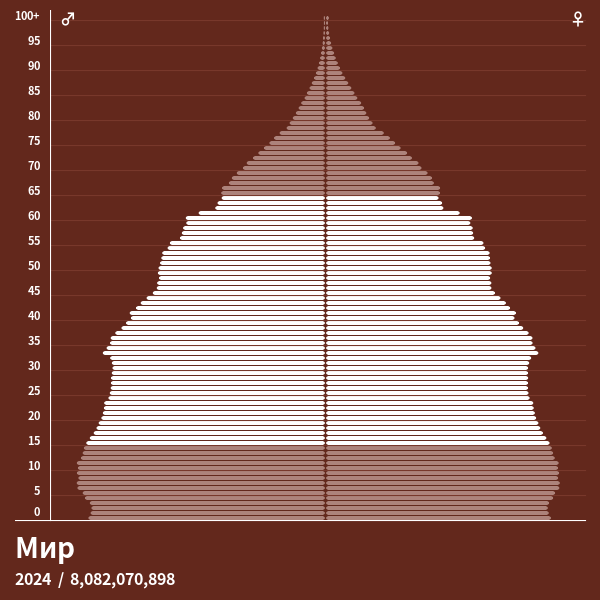